# Forex

### Data Cleaning & Transformation

#### 1) Importing DataSet

In [1]:
#importing new forex dataset
#df_forex=pd.read_csv("euro-daily-hist_1999_2020.csv") #,parse_dates =["Period"])
import numpy as np
import pandas as pd
df_forex=pd.read_csv("euro-daily-hist_1999_2020.csv",parse_dates =["Period"], index_col="Period")
df_aggr_covid19_data=pd.read_csv("aggr_covid_data.csv")
#from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### 2) Displaying Data

###### Forex DataSet 

In [2]:
#displaying the forex dataset
df_forex.head()

,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],Chinese_yuan,[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
Period,,,,,,,,,,,,,,,,,,,,,
2021-12-02,1.5666,1.9558,6.5302,1.5418,1.0803,7.8207,NaN,25.753,7.4361,NaN,...,4.8746,89.8055,10.0818,1.6066,NaN,NaN,36.215,8.5010,1.2108,17.7362
2021-11-02,1.5638,1.9558,6.4936,1.5384,1.0802,7.8448,NaN,25.772,7.438,NaN,...,4.8745,89.3792,10.0868,1.608,NaN,NaN,36.271,8.5254,1.2147,17.7533
2021-10-02,1.5682,1.9558,6.5641,1.5394,1.0805,7.8235,NaN,25.835,7.4373,NaN,...,4.8752,89.5116,10.08,1.608,NaN,NaN,36.266,8.5503,1.2127,17.8301
2021-09-02,1.5681,1.9558,6.553,1.5414,1.0817,7.7894,NaN,25.738,7.4369,NaN,...,4.8753,89.6164,10.1058,1.6074,NaN,NaN,36.239,8.5883,1.2104,17.8953
2021-08-02,1.5693,1.9558,6.4955,1.5363,1.0842,7.7618,NaN,25.739,7.4365,NaN,...,4.8748,89.4049,10.1148,1.6067,NaN,NaN,36.098,8.5308,1.2025,17.9701


In [3]:
df_aggr_covid19_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


#### 3) Filtering Data 

 **a. Filtering Forex Data**

In [4]:
#The scope of this study is limited to the following countries : Germany, India, Italy, UK, USA & China.
#Therefore, we consider only currency that are used in those countries. 
#We consider Euro, Indian Rupees, US Dollars, UK's Pounds, Chinese Yuan. 
#Hence, we drop all other coloumns because those are out of scope. 

#The rates are with respect to 1 euro.For example, 1 Euro is 87.877 Indian Rupees
df_forex= df_forex[[ "Indian_rupee", "UK_pound_sterling", "Chinese_yuan", "US_dollar"]]
df_forex.head()

,Indian_rupee,UK_pound_sterling,Chinese_yuan,US_dollar
Period,,,,
2021-12-02,87.877,0.87753,7.8207,1.2108
2021-11-02,88.404,0.87755,7.8448,1.2147
2021-10-02,88.3185,0.8765,7.8235,1.2127
2021-09-02,88.2765,0.87828,7.7894,1.2104
2021-08-02,87.724,0.87833,7.7618,1.2025


In [5]:
#filtering data
#We consider only data of year 2020
df_forex = df_forex.filter(like = '2020', axis=0)
df_forex.head()

,Indian_rupee,UK_pound_sterling,Chinese_yuan,US_dollar
Period,,,,
2020-12-31,89.6605,0.89903,8.0225,1.2271
2020-12-30,89.8824,0.90307,8.0134,1.2281
2020-12-29,89.942,0.90863,8.007,1.2259
2020-12-28,89.8145,0.90408,7.9906,1.2219
2020-12-24,89.6845,0.89795,7.9624,1.2193


##### b. Filtering the COVID-19 Aggregated Data

In [6]:
# Selecting only countries : India,China,USA, UK and dropping the rest
df_aggr_covid19_data=df_aggr_covid19_data.drop(
                           df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'India']  
                          & df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'China'] 
                          & df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'United States'] 
                          & df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'United Kingdom']) 
df_aggr_covid19_data.head()

<ipython-input-6-b01b9006afd7>:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'India']


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11542,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11543,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11544,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11545,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11546,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752


In [7]:
# Condsidering data only for year 2020
#Using a boolean mask:

df_aggr_covid19_data['date'] = pd.to_datetime(df_aggr_covid19_data['date']) 
mask = (df_aggr_covid19_data['date'] > '2020-1-1') & (df_aggr_covid19_data['date'] <= '2020-12-31')
df_aggr_covid19_data = df_aggr_covid19_data.loc[mask]
df_aggr_covid19_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11542,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11543,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11544,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11545,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11546,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752


In [8]:
#Deriving new columns 'year' and 'month' from 'date'
df_aggr_covid19_data['month'] = df_aggr_covid19_data['date'].dt.month
df_aggr_covid19_data['year'] = df_aggr_covid19_data['date'].dt.year
df_aggr_covid19_data=df_aggr_covid19_data.groupby(['year','location','month'])['new_cases'].sum().to_frame(name = 'Monthly_new_cases').reset_index()
df_aggr_covid19_data.head()

,year,location,month,Monthly_new_cases
0,2020,China,1,9254.0
1,2020,China,2,69554.0
2,2020,China,3,2923.0
3,2020,China,4,1677.0
4,2020,China,5,190.0


In [9]:
#Creating a new column :'PG_Rate' that stores the COVID-19's Growth Rate in Percent
df_aggr_covid19_data['PG_Rate']= (df_aggr_covid19_data['Monthly_new_cases'] - df_aggr_covid19_data['Monthly_new_cases'].shift(1)) * 100/ df_aggr_covid19_data['Monthly_new_cases'].shift(1)
df_aggr_covid19_data.head()

,year,location,month,Monthly_new_cases,PG_Rate
0,2020,China,1,9254.0,NaN
1,2020,China,2,69554.0,651.610115
2,2020,China,3,2923.0,-95.797510
3,2020,China,4,1677.0,-42.627438
4,2020,China,5,190.0,-88.670244


In [10]:
#Replacing the month number as name of month 
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
df_aggr_covid19_data = df_aggr_covid19_data.replace({"month": replace_values})  
df_aggr_covid19_data 

,year,location,month,Monthly_new_cases,PG_Rate
0,2020,China,Jan,9254.0,NaN
1,2020,China,Feb,69554.0,6.516101e+02
2,2020,China,Mar,2923.0,-9.579751e+01
3,2020,China,Apr,1677.0,-4.262744e+01
4,2020,China,May,190.0,-8.867024e+01
5,2020,China,Jun,639.0,2.363158e+02
6,2020,China,Jul,2870.0,3.491393e+02
7,2020,China,Aug,2259.0,-2.128920e+01
8,2020,China,Sep,631.0,-7.206729e+01
9,2020,China,Oct,821.0,3.011094e+01


#### 4) Data Transformation

###### a. Changing the DataType

In [11]:
#Converting the datatype of all the currencies into numeric value 
df_forex = df_forex.apply(pd.to_numeric)


In [12]:
#Checking the datatype
type(df_forex.Chinese_yuan[30])

numpy.float64

##### b. Computing Mean Values for data

In [13]:
#The initial data was based on forex rate per day. Computing the mean of the forex rate per month.
df_mean_forex=df_forex.resample('M').mean()

In [14]:
#The result is monthly mean of each currency 
df_mean_forex

,Indian_rupee,UK_pound_sterling,Chinese_yuan,US_dollar
Period,,,,
2020-01-31,80.773481,0.862455,7.735186,1.119738
2020-02-29,80.682429,0.859176,7.723886,1.110548
2020-03-31,83.077413,0.898132,7.795700,1.113091
2020-04-30,83.633348,0.878425,7.766957,1.109757
2020-05-31,83.326550,0.889991,7.821600,1.109985
2020-06-30,84.657095,0.894326,7.913581,1.128071
2020-07-31,85.732750,0.899423,8.011654,1.150279
2020-08-31,86.813310,0.896326,8.066171,1.167295
2020-09-30,86.019773,0.904855,7.947986,1.165791


##### c. Rounding off the values

In [15]:
#Rounding off the values
df_mean_forex.round(2)
df_mean_forex_copy = df_mean_forex.round(2)
df_mean_forex_copy

,Indian_rupee,UK_pound_sterling,Chinese_yuan,US_dollar
Period,,,,
2020-01-31,80.77,0.86,7.74,1.12
2020-02-29,80.68,0.86,7.72,1.11
2020-03-31,83.08,0.90,7.80,1.11
2020-04-30,83.63,0.88,7.77,1.11
2020-05-31,83.33,0.89,7.82,1.11
2020-06-30,84.66,0.89,7.91,1.13
2020-07-31,85.73,0.90,8.01,1.15
2020-08-31,86.81,0.90,8.07,1.17
2020-09-30,86.02,0.90,7.95,1.17


#### 4) Merging two DataFrames
Here we merge DataFrame 'df_aggr_covid19_data' and 'df_mean_forex_copy' based on country and month

In [16]:
df_mean_forex_copy

,Indian_rupee,UK_pound_sterling,Chinese_yuan,US_dollar
Period,,,,
2020-01-31,80.77,0.86,7.74,1.12
2020-02-29,80.68,0.86,7.72,1.11
2020-03-31,83.08,0.90,7.80,1.11
2020-04-30,83.63,0.88,7.77,1.11
2020-05-31,83.33,0.89,7.82,1.11
2020-06-30,84.66,0.89,7.91,1.13
2020-07-31,85.73,0.90,8.01,1.15
2020-08-31,86.81,0.90,8.07,1.17
2020-09-30,86.02,0.90,7.95,1.17


In [17]:
df_aggr_covid19_data

,year,location,month,Monthly_new_cases,PG_Rate
0,2020,China,Jan,9254.0,NaN
1,2020,China,Feb,69554.0,6.516101e+02
2,2020,China,Mar,2923.0,-9.579751e+01
3,2020,China,Apr,1677.0,-4.262744e+01
4,2020,China,May,190.0,-8.867024e+01
5,2020,China,Jun,639.0,2.363158e+02
6,2020,China,Jul,2870.0,3.491393e+02
7,2020,China,Aug,2259.0,-2.128920e+01
8,2020,China,Sep,631.0,-7.206729e+01
9,2020,China,Oct,821.0,3.011094e+01


In [18]:
#Decalring a list of month
month = ['Jan', 'Feb', 'Mar', 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug', 'Sep','Oct','Nov','Dec'] 
df_mean_forex_copy['month'] = month
df_mean_forex_copy

,Indian_rupee,UK_pound_sterling,Chinese_yuan,US_dollar,month
Period,,,,,
2020-01-31,80.77,0.86,7.74,1.12,Jan
2020-02-29,80.68,0.86,7.72,1.11,Feb
2020-03-31,83.08,0.90,7.80,1.11,Mar
2020-04-30,83.63,0.88,7.77,1.11,Apr
2020-05-31,83.33,0.89,7.82,1.11,May
2020-06-30,84.66,0.89,7.91,1.13,Jun
2020-07-31,85.73,0.90,8.01,1.15,Jul
2020-08-31,86.81,0.90,8.07,1.17,Aug
2020-09-30,86.02,0.90,7.95,1.17,Sep


In [19]:
#Rearranging the columns
df_mean_forex_copy = df_mean_forex_copy[["month", "Chinese_yuan", "Indian_rupee", "UK_pound_sterling", "US_dollar"]]
df_mean_forex_copy

,month,Chinese_yuan,Indian_rupee,UK_pound_sterling,US_dollar
Period,,,,,
2020-01-31,Jan,7.74,80.77,0.86,1.12
2020-02-29,Feb,7.72,80.68,0.86,1.11
2020-03-31,Mar,7.80,83.08,0.90,1.11
2020-04-30,Apr,7.77,83.63,0.88,1.11
2020-05-31,May,7.82,83.33,0.89,1.11
2020-06-30,Jun,7.91,84.66,0.89,1.13
2020-07-31,Jul,8.01,85.73,0.90,1.15
2020-08-31,Aug,8.07,86.81,0.90,1.17
2020-09-30,Sep,7.95,86.02,0.90,1.17


In [20]:
#Using the melt function to rearrange the coulmns Chinese_yuan,Indian_rupee,UK_pound_sterling,US_dollar as rows
df_mean_forex_copy = df_mean_forex_copy.melt(id_vars=["month"], var_name="Currency", value_name="Rate")
df_mean_forex_copy

,month,Currency,Rate
0,Jan,Chinese_yuan,7.74
1,Feb,Chinese_yuan,7.72
2,Mar,Chinese_yuan,7.80
3,Apr,Chinese_yuan,7.77
4,May,Chinese_yuan,7.82
5,Jun,Chinese_yuan,7.91
6,Jul,Chinese_yuan,8.01
7,Aug,Chinese_yuan,8.07
8,Sep,Chinese_yuan,7.95
9,Oct,Chinese_yuan,7.90


In [21]:
#Before integrating we check in detail more about both the DataFrames
df_aggr_covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               48 non-null     int64  
 1   location           48 non-null     object 
 2   month              48 non-null     object 
 3   Monthly_new_cases  48 non-null     float64
 4   PG_Rate            47 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ KB


In [22]:
df_mean_forex_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     48 non-null     object 
 1   Currency  48 non-null     object 
 2   Rate      48 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [23]:
#Adding columns of 'df_mean_forex_copy' as columns of  'df_aggr_covid19_data'
df_aggr_covid19_data['Currency'] = df_mean_forex_copy['Currency']
df_aggr_covid19_data['Rate'] = df_mean_forex_copy['Rate']
df_aggr_covid19_data

,year,location,month,Monthly_new_cases,PG_Rate,Currency,Rate
0,2020,China,Jan,9254.0,NaN,Chinese_yuan,7.74
1,2020,China,Feb,69554.0,6.516101e+02,Chinese_yuan,7.72
2,2020,China,Mar,2923.0,-9.579751e+01,Chinese_yuan,7.80
3,2020,China,Apr,1677.0,-4.262744e+01,Chinese_yuan,7.77
4,2020,China,May,190.0,-8.867024e+01,Chinese_yuan,7.82
5,2020,China,Jun,639.0,2.363158e+02,Chinese_yuan,7.91
6,2020,China,Jul,2870.0,3.491393e+02,Chinese_yuan,8.01
7,2020,China,Aug,2259.0,-2.128920e+01,Chinese_yuan,8.07
8,2020,China,Sep,631.0,-7.206729e+01,Chinese_yuan,7.95
9,2020,China,Oct,821.0,3.011094e+01,Chinese_yuan,7.90


### Data Visualization  

##### 1) Graph depicting the currency rates w.r.t to Euro on monthly basis in 2020

<AxesSubplot:xlabel='Period'>

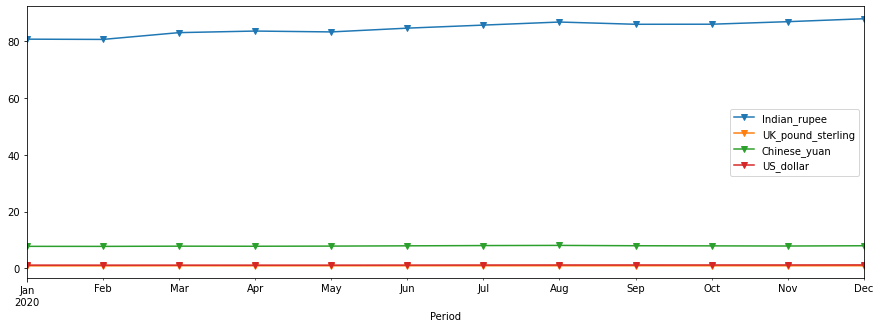

In [24]:
#Plotting the forex rates for each currency in each month of 2020
df_mean_forex.plot(marker="v",figsize=(15,5))

#####  Observation

- Indian Rupees w.r.t Euro has highest exchange rate. 
- The highest is Indian Rupees followed by Chinese Yuan, US Dollar and Sterling Pound.
- This means the differnce between Euro and Indian Rupees is highest , while the difference between UK's Pound is lowest.
- Therefore, one needs to pay more Indian Rupees to buy 1 Euro


##### 2) Graph depicting the the percentage change in currency w.r.t to Euro on monthly basis in 2020

<AxesSubplot:xlabel='Period'>

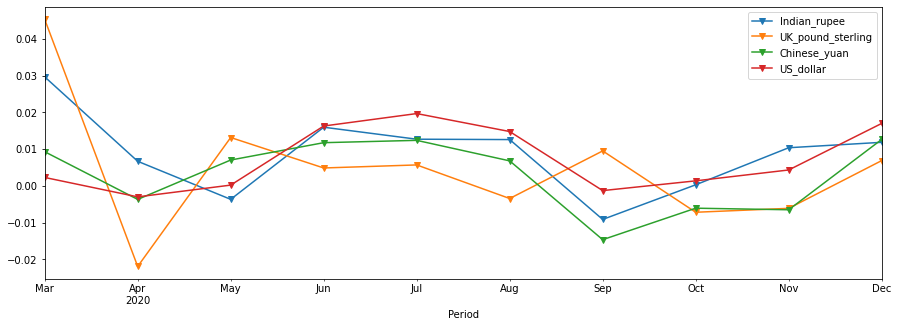

In [25]:
#Plotting the percentage change in currency over the months in 2020
df_mean_forex.pct_change().iloc[2:].plot(marker="v",figsize=(15,5))

##### Observation
- High fluctuations are observed in all the currencies in 2020

##### 3) Graphs depicting impact of COVID-19 Growth on various Currencies

In [31]:
#Creating DataFrames of each currency/country
df_China=df_aggr_covid19_data.loc[df_aggr_covid19_data['location'] == 'China']
df_India=df_aggr_covid19_data.loc[df_aggr_covid19_data['location'] == 'India']
df_UK=df_aggr_covid19_data.loc[df_aggr_covid19_data['location'] == 'United Kingdom']
df_USA=df_aggr_covid19_data.loc[df_aggr_covid19_data['location'] == 'United States']


## China

In [32]:
df_China

,year,location,month,Monthly_new_cases,PG_Rate,Currency,Rate
0,2020,China,Jan,9254.0,NaN,Chinese_yuan,7.74
1,2020,China,Feb,69554.0,651.610115,Chinese_yuan,7.72
2,2020,China,Mar,2923.0,-95.797510,Chinese_yuan,7.80
3,2020,China,Apr,1677.0,-42.627438,Chinese_yuan,7.77
4,2020,China,May,190.0,-88.670244,Chinese_yuan,7.82
5,2020,China,Jun,639.0,236.315789,Chinese_yuan,7.91
6,2020,China,Jul,2870.0,349.139280,Chinese_yuan,8.01
7,2020,China,Aug,2259.0,-21.289199,Chinese_yuan,8.07
8,2020,China,Sep,631.0,-72.067286,Chinese_yuan,7.95
9,2020,China,Oct,821.0,30.110935,Chinese_yuan,7.90


##### a. Impact of COVID-19 Growth on Chinese_yuan	

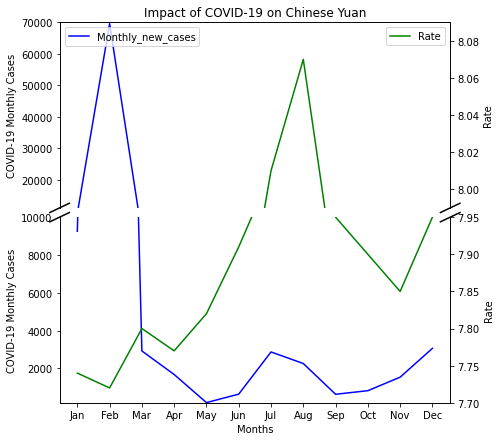

In [77]:
### import numpy as np
import matplotlib.pyplot as plt

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(11000, 70000)  # outliers only
ax2.set_ylim(180, 10000)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(7.99, 8.09)
ax4.set_ylim(7.70, 7.95)

# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = df_China['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = df_China['Monthly_new_cases']
yright = df_China['Rate']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='Monthly_new_cases')
ax2.plot(x, yleft2, c='b', label='Monthly_new_cases')

ax3.plot(x, yright, c='g', label='Rate')
ax4.plot(x, yright, c='g', label='Rate')

ax1.legend(loc=2)
ax3.legend(loc=1)

ax1.set_title("Impact of COVID-19 on Chinese Yuan")
ax1.set_ylabel("COVID-19 Monthly Cases")
ax2.set_ylabel("COVID-19 Monthly Cases")
ax3.set_ylabel("Rate")
ax4.set_ylabel("Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- It is observed that Chinese Yuan Rate shows non-uniform correlation with COVID-19 Rate.
- For e.g sometimes it is independent of the increase in covid-19 rate, while in other times the rate is increasing as the covid-19 cases increase.


##### b. Linear Regression (Chinese Yuan)

r2 is 0.22821053844476435


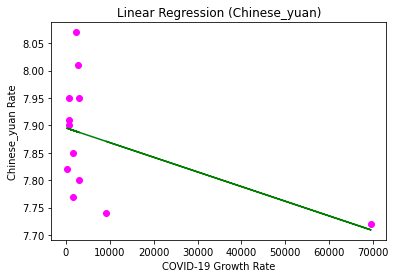

In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

y =df_China['Rate'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X=df_China['Monthly_new_cases'].values.reshape(-1,1)

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (Chinese_yuan)')
plt.ylabel('Chinese_yuan Rate')
plt.xlabel('COVID-19 Growth Rate')

y_pred=regressor.predict(X)
r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))

plt.show()

##### Observation
- r2 is 0.22821053844476435 = 0.22 = 22%
- Slope is negative, meaning inversely proportional.
- Increase in COVID-19 results in decrease in Chinese Yuan price on average.


##### b. Cummulative Sum of COVID-19 Cases Vs. Chinese Yuan Rate

## India

In [79]:
df_India

,year,location,month,Monthly_new_cases,PG_Rate,Currency,Rate
12,2020,India,Jan,1.0,-99.967331,Indian_rupee,80.77
13,2020,India,Feb,2.0,100.000000,Indian_rupee,80.68
14,2020,India,Mar,1394.0,69600.000000,Indian_rupee,83.08
15,2020,India,Apr,33466.0,2300.717360,Indian_rupee,83.63
16,2020,India,May,155746.0,365.385765,Indian_rupee,83.33
17,2020,India,Jun,394872.0,153.535885,Indian_rupee,84.66
18,2020,India,Jul,1110507.0,181.232146,Indian_rupee,85.73
19,2020,India,Aug,1995178.0,79.663703,Indian_rupee,86.81
20,2020,India,Sep,2621418.0,31.387676,Indian_rupee,86.02
21,2020,India,Oct,1871498.0,-28.607418,Indian_rupee,86.04


##### a. Impact of COVID-19 Growth on Indian Rupees

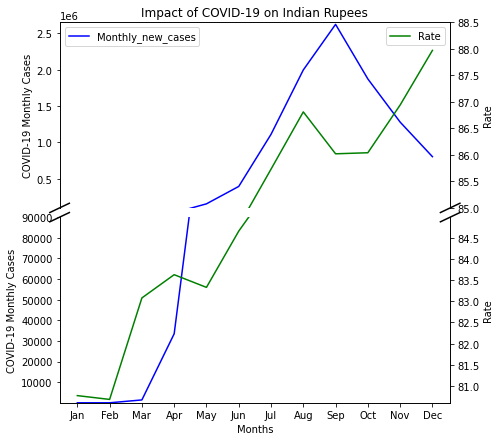

In [80]:
### import numpy as np
import matplotlib.pyplot as plt

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(100000, 2650000)  # outliers only                
ax2.set_ylim(1, 90000)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(85.00, 88.50)
ax4.set_ylim(80.60, 84.99)

# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = df_India['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = df_India['Monthly_new_cases']
yright = df_India['Rate']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='Monthly_new_cases')
ax2.plot(x, yleft2, c='b', label='Monthly_new_cases')

ax3.plot(x, yright, c='g', label='Rate')
ax4.plot(x, yright, c='g', label='Rate')

ax1.legend(loc=2)
ax3.legend(loc=1)

ax1.set_title("Impact of COVID-19 on Indian Rupees")
ax1.set_ylabel("COVID-19 Monthly Cases")
ax2.set_ylabel("COVID-19 Monthly Cases")
ax3.set_ylabel("Rate")
ax4.set_ylabel("Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- It is observed that there has been increase in Indian Rupees's Rate as the COVID-19 Cases increased.
- However, inspite of the delcine in cases from September 2020, increase in Indian Rupees was seen between Oct to Dec 2020

##### b. Linear Regression (Indian Rupees)

r2 is 0.5139863774377835


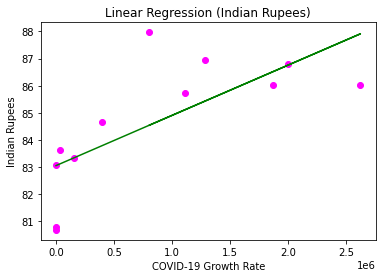

In [81]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

y =df_India['Rate'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X=df_India['Monthly_new_cases'].values.reshape(-1,1)

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (Indian Rupees)')
plt.ylabel('Indian Rupees')
plt.xlabel('COVID-19 Growth Rate')

y_pred=regressor.predict(X)
r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))

plt.show()

##### Observation
- r2 is 0.5139863774377835 = 0.51 = 51%
- This Linear Regression graph is quite accurate for computing the Indian Rupees Rate based on Monthly Cases because r2 is 51%
- The slope is postive meaning the Indian Rupees Rate and covid cases are directly proportional
- There has been an increase in the Indian Rupees rate as the monthly cases increased

## United Kingdom

In [82]:
df_UK

,year,location,month,Monthly_new_cases,PG_Rate,Currency,Rate
24,2020,United Kingdom,Jan,2.0,-99.999751,UK_pound_sterling,0.86
25,2020,United Kingdom,Feb,59.0,2850.000000,UK_pound_sterling,0.86
26,2020,United Kingdom,Mar,38754.0,65584.745763,UK_pound_sterling,0.90
27,2020,United Kingdom,Apr,139956.0,261.139495,UK_pound_sterling,0.88
28,2020,United Kingdom,May,78768.0,-43.719455,UK_pound_sterling,0.89
29,2020,United Kingdom,Jun,27677.0,-64.862635,UK_pound_sterling,0.89
30,2020,United Kingdom,Jul,19577.0,-29.266178,UK_pound_sterling,0.90
31,2020,United Kingdom,Aug,33290.0,70.046483,UK_pound_sterling,0.90
32,2020,United Kingdom,Sep,117763.0,253.748874,UK_pound_sterling,0.90
33,2020,United Kingdom,Oct,558947.0,374.637195,UK_pound_sterling,0.90


##### a. Impact of COVID-19 Growth on UK's Pound

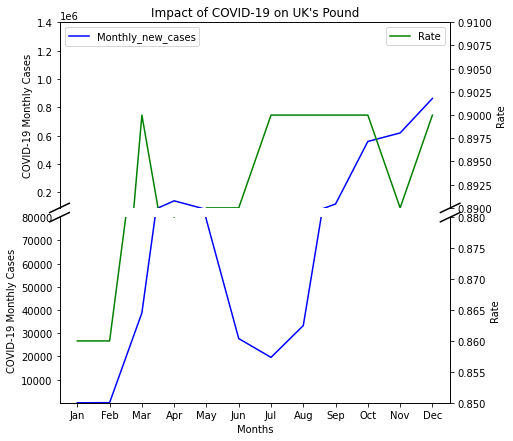

In [83]:
### import numpy as np
import matplotlib.pyplot as plt

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(90000, 1400000)  # outliers only                
ax2.set_ylim(1, 80000)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(0.89, 0.91)
ax4.set_ylim(0.85, 0.88)

# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = df_UK['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = df_UK['Monthly_new_cases']
yright = df_UK['Rate']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='Monthly_new_cases')
ax2.plot(x, yleft2, c='b', label='Monthly_new_cases')

ax3.plot(x, yright, c='g', label='Rate')
ax4.plot(x, yright, c='g', label='Rate')

ax1.legend(loc=2)
ax3.legend(loc=1)

ax1.set_title("Impact of COVID-19 on UK's Pound")
ax1.set_ylabel("COVID-19 Monthly Cases")
ax2.set_ylabel("COVID-19 Monthly Cases")
ax3.set_ylabel("Rate")
ax4.set_ylabel("Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- No direct relation between COVID-19 cases and UK's Pound can be seen.
- We can't say that COVID-19 had much impact on Pound's Rate

##### b. Linear Regression (UK Pound)

r2 is 0.12018945204382236


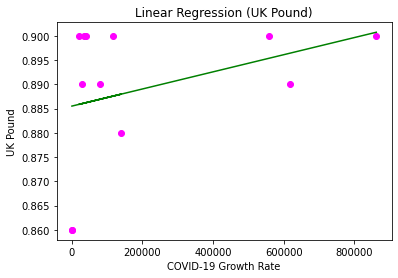

In [84]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

y =df_UK['Rate'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X=df_UK['Monthly_new_cases'].values.reshape(-1,1)

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (UK Pound)')
plt.ylabel('UK Pound')
plt.xlabel('COVID-19 Growth Rate')

y_pred=regressor.predict(X)
r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))

plt.show()

##### Observation
-  r2 is 0.12018945204382236 = 0.12 = 12%
- This Linear Regression graph is not that efficient for computing the UK's Pound Rate based on Monthly Cases. Because the r2 value is only 12%
- The slope is postive meaning the Pound Rate and covid cases are directly proportional
- There has been an increase in the Pound Rate rate as the monthly cases increased

## United States

In [85]:
df_USA

,year,location,month,Monthly_new_cases,PG_Rate,Currency,Rate
36,2020,United States,Jan,7.0,-9.999919e+01,US_dollar,1.12
37,2020,United States,Feb,17.0,1.428571e+02,US_dollar,1.11
38,2020,United States,Mar,192152.0,1.130206e+06,US_dollar,1.11
39,2020,United States,Apr,888708.0,3.625026e+02,US_dollar,1.11
40,2020,United States,May,717846.0,-1.922589e+01,US_dollar,1.11
41,2020,United States,Jun,843041.0,1.744037e+01,US_dollar,1.13
42,2020,United States,Jul,1924684.0,1.283025e+02,US_dollar,1.15
43,2020,United States,Aug,1458899.0,-2.420060e+01,US_dollar,1.17
44,2020,United States,Sep,1206247.0,-1.731799e+01,US_dollar,1.17
45,2020,United States,Oct,1926777.0,5.973321e+01,US_dollar,1.17


##### a. Impact of COVID-19 Growth on US Dollar 

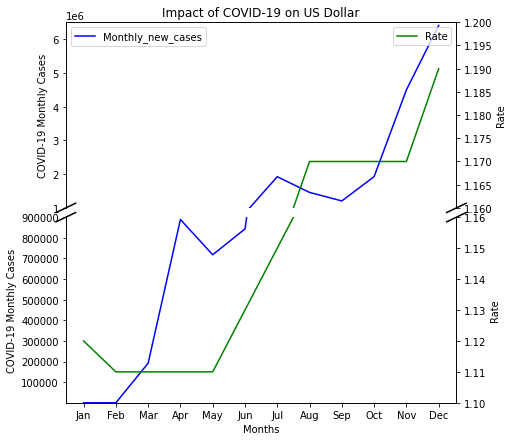

In [86]:
### import numpy as np
import matplotlib.pyplot as plt

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(1000000, 6500000)  # outliers only                
ax2.set_ylim(5, 900000)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(1.16, 1.20)
ax4.set_ylim(1.10, 1.16)

# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = df_USA['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = df_USA['Monthly_new_cases']
yright = df_USA['Rate']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='Monthly_new_cases')
ax2.plot(x, yleft2, c='b', label='Monthly_new_cases')

ax3.plot(x, yright, c='g', label='Rate')
ax4.plot(x, yright, c='g', label='Rate')

ax1.legend(loc=2)
ax3.legend(loc=1)

ax1.set_title("Impact of COVID-19 on US Dollar")
ax1.set_ylabel("COVID-19 Monthly Cases")
ax2.set_ylabel("COVID-19 Monthly Cases")
ax3.set_ylabel("Rate")
ax4.set_ylabel("Rate")
ax2.set_xlabel("Months")

plt.show()

##### Obseravation
- Overall both the COVID-19 line and US Dollar Rate has an upward trend.
- This means increase in COVID-19 has resuted in Increase in US Dollar Rate

##### b. Linear Regression (US Dollar)

r2 is 0.5988530681023008


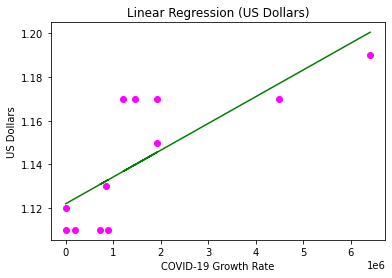

In [87]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

y =df_USA['Rate'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X=df_USA['Monthly_new_cases'].values.reshape(-1,1)

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (US Dollars)')
plt.ylabel('US Dollars')
plt.xlabel('COVID-19 Growth Rate')

y_pred=regressor.predict(X)
r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))

plt.show()

###### Observation
- r2 is 0.5988530681023008 = 0.59 = 59%
- This Linear Regression graph is quite accurate for computing the US Dollar Rate based on Monthly Cases because r2 is 59%
- The slope is postive meaning the US Dollar Rate and covid cases are directly proportional
- There has been an increase in the US Dollar rate as the monthly cases increased

## Conclusion 
- We considered 4 currencies w.r.t Euros
- It was observed that the rates of all currenices had a direct proportion to Monthly COVID-19 Cases
- However, only Chinese Yuan is observed as inversely proportional to Monthly COVID-19 Cases
- Moreover, out of countries, it s observed that US Dollar's Linear Regression model had the best fit line followed by Indian Rupee's Regression model
- We conclude that COVID-19 had mostly direct proportial impact on the currency rates